<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='pics/banner.PNG'/></a>
</div>
<div>
<a href=''><img src='pics/miw.PNG'/></a>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Practicum Basis Statistiek / SQL </h1>

<h2>Imports<h2>

In [155]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3
from PIL import Image
import pandas as pd
import sqlite3

<h2>Extract, Transform and Load</h2>

<h3>Extract</h3>

In [156]:
# https://raw.githubusercontent.com/ajturner/acetate/master/places/Countries-Europe.csv
csvFile = "csv/countries_europe.csv"
euCsvFile = "csv/european_union.csv"

 # Create Pandas DataFrames
europeDF = pd.read_csv(csvFile)
euDF = pd.read_csv(csvFile)
# print(europeDF)
print(euDF)

    zoom                    name  abbreviation Code  ISO numeric  \
0      3                 Ukraine          Ukr.  UKR          804   
1      3                  France           Fr.  FRA          250   
2      3                   Spain         Spain  ESP          724   
3      3                  Sweden          Swe.  SWE          752   
4      3                 Germany          Ger.  DEU          276   
5      3                 Finland          Fin.  FIN          246   
6      3                  Norway          Nor.  NOR          578   
7      3                  Poland          Pol.  POL          616   
8      3                   Italy         Italy  ITA          380   
9      3          United Kingdom          U.K.  GBR          826   
10     3                 Romania          Rom.  ROU          642   
11     3                 Belarus         Bela.  BLR          112   
12     3                  Greece          Grc.  GRC          300   
13     3                Bulgaria          Blg.  

<h3>Transform</h3>

<h3>Exercise 1</h3>
<h4>Gegeven</h4>

In [157]:
benelux = {"Belgium", "The Netherlands", "Luxembourg"}
nordics = {"Denmark", "Finland", "Iceland", "Norway", "Sweden"}
baltics = {"Estonia", "Latvia", "Lithuania"}

<h4>Gevraagd</h4>
<ol>
    <li>Voeg de kolom <u>group</u> toe aan de dataset <u>europeDF</u> met daarin de groep waartoe een land behoort volgens bovenstaande sets</li>
    <li>Ga na of er nog meer landengroepen zijn binnen Europa en voeg die ook toe</li>
    <li>Sla deze verrijkte dataset op in een nieuw CSV bestand</li>
</ol>

<h4>Oplossing</h4>

In [158]:
# Oplossing

group = [Ukraine, France, Spain-Iberia, Nordics          Swe.  SWE          752   
4      3                 Germany          Ger.  DEU          276   
5      3                 Finland          Fin.  FIN          246   
6      3                  Norway          Nor.  NOR          578   
7      3                  Poland          Pol.  POL          616   
8      3                   Italy         Italy  ITA          380   
9      3          United Kingdom          U.K.  GBR          826   
10     3                 Romania          Rom.  ROU          642   
11     3                 Belarus         Bela.  BLR          112   
12     3                  Greece          Grc.  GRC          300   
13     3                Bulgaria          Blg.  BGR          100   
14     3                 Iceland          Ice.  ISL          352   
15     3                Portugal         Port.  PRT          620   
16     3          Czech Republic    Czech Rep.  CZE          203   
17     3                 Denmark          Den.  DNK          208   
18     4                 Hungary         Hung.  HUN          348   
19     4                  Serbia         Serb.  SRB          688   
20     4                 Austria          Aus.  AUT           40   
21     4                 Ireland          Ire.  IRL          372   
22     4               Lithuania         Lith.  LTU          440   
23     4                  Latvia          Lat.  LVA          428   
24     4                 Croatia          Cro.  HRV          191   
25     4  'Bosnia and Herzegovina'          Bos.  BIH           70   
26     4                Slovakia         Slvk.  SVK          703   
27     4                 Estonia          Est.  EST          233   
28     4             Netherlands         Neth.  NLD          528   
29     4             Switzerland        Switz.  CHE          756   
30     4                 Moldova          Mol.  MDA          498   
31     4                 Belgium          Bel.  BEL           56   
32     4                 Albania          Alb.  ALB            8   
33     4               Macedonia          Mac.  MKD          807   
34     4                Slovenia         Slvn.  SVN          705   
35     4              Montenegro         Mont.  MNE          499   
36     4                  Cyprus          Cyp.  CYP          196   
37     4              Luxembourg          Lux.  LUX          442   
38     4               Faroe Is.      Far. Is.  FRO          234   
39     4                 Andorra          And.  AND           20   
40     4                   Malta         Malta  MLT          470   
41     4           Liechtenstein        Liech.  LIE          438   
42     4                Guernsey        Guern.  GGY          831   
43     4              San Marino       S. Mar.  SMR          674   
44     4               Gibraltar          Gib.  GIB          292   
45     4                  Monaco        Monaco  MCO          492   
46     4            Vatican City] 

europeDF["Group"] = group

print(europeDF)

# europeDF.iloc[28, 31] = ['benelux']

ValueError: Length of values (0) does not match length of index (47)

<h3>Load</h3>

<p>Maak een lege database</p>

In [159]:
!sqlite3 db/europe.db "VACUUM;"

In [160]:
# Connect to SQLite database
dbConnection = sqlite3.connect('db/europe.db')

<p>Maak tabellen o.b.v. de dataset</p>

In [161]:
europeDF.to_sql('countries', dbConnection, if_exists='replace', index = False)
euDF.to_sql('eu', dbConnection, if_exists='replace', index = False)

47

In [162]:
dbCursor = dbConnection.cursor()

query = """
    SELECT *
    FROM countries
    INNER JOIN eu
    ON countries.Code = eu.Code
"""

result = dbCursor.execute(query).fetchall()
print(result)
print(type(result))

[(4, 'Austria', 'Aus.', 'AUT', 40, 83858.0, 8205000, 47.33, 13.33, 'eu', 4, 'Austria', 'Aus.', 'AUT', 40, 83858.0, 8205000, 47.33, 13.33, 'eu')]
<class 'list'>


In [163]:
query = """
    SELECT Code
    FROM countries
"""

result = dbCursor.execute(query).fetchall()
print(result)
print(type(result))

[('UKR',), ('FRA',), ('ESP',), ('SWE',), ('DEU',), ('FIN',), ('NOR',), ('POL',), ('ITA',), ('GBR',), ('ROU',), ('BLR',), ('GRC',), ('BGR',), ('ISL',), ('PRT',), ('CZE',), ('DNK',), ('HUN',), ('SRB',), ('AUT',), ('IRL',), ('LTU',), ('LVA',), ('HRV',), ('BIH',), ('SVK',), ('EST',), ('NLD',), ('CHE',), ('MDA',), ('BEL',), ('ALB',), ('MKD',), ('SVN',), ('MNE',), ('CYP',), ('LUX',), ('FRO',), ('AND',), ('MLT',), ('LIE',), ('GGY',), ('SMR',), ('GIB',), ('MCO',), ('VAT',)]
<class 'list'>


<h2>Afhankelijke en onafhankelijke variabelen</h2>

<h3>Overlappende uitkomsten</h3>

In [164]:
eu = {"Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "The Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"}

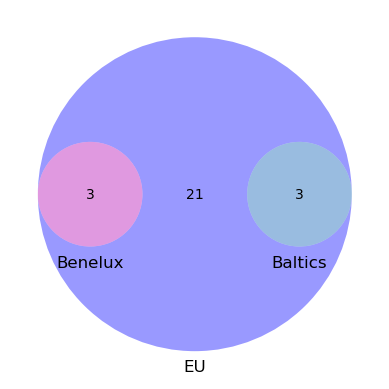

In [165]:
venn3([benelux, baltics, eu], ('Benelux', 'Baltics', 'EU'))

<h3>Exercise 2</h3>
<p>
    Gebruik SQL queries voor het verkrijgen van
<ol>
    <li>P(Nordics); de kans dat een land onderdeel is van de Nordics</li>
    <li><u>P(EU)</u>; de kans dat een Europees land lid is van de Europese Unie</li>
    <li><u>P(EU and Nordics)</u>; de kans dat een land onderdeel is van de Norics en lid is van de EU</li>
</ol>
</p>

In [166]:
# Close connection to SQLite database
dbConnection.close()